### Pair IV
# Métricas

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y métricas
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score


#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


# Para poder ver todas las columnas del dataframe
# ------------------------------------------------
pd.options.display.max_columns = None

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Set2", 20)

En el ejercicio de pair programming anterior ajustastéis vuestro primer modelito de regresión logística. Ahora es el momento de saber como de bueno es nuestro modelo. Para esto, los objetivos del pair de hoy son:
- Calculad las métricas para vuestro modelo
- Interpretad las métricas obtenidas, ¿es un buen modelo? ¿hay overfitting o underfitting?

In [2]:
df = pd.read_pickle("../data/ajuste_outliers_sin_tratar.pkl")
df.sample(2)

,satisfaccion,genero,cliente,viaje,clase,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,edad,distancia,retraso_salida
110949,1,0,0,1,1,4,4,4,4,2,5,4,5,5,4,5,4,5,5,1.228366,-1.698364,2.397792
92165,1,1,0,1,0,4,4,4,4,4,4,4,4,3,4,4,3,1,4,-0.292868,-0.395681,-0.202614


```Ajuste del modelo variables estandarizadas y codificadas ```

In [3]:
# separamos los datos en X e y

X1 = df.drop("satisfaccion", axis = 1)
y1 = df["satisfaccion"]

In [4]:
# comprobamos que tenemos en X, deberíamos tener todas nuestras variables predictoras
X1.head()

,genero,cliente,viaje,clase,asiento,puntualidad,comida_bebida,puerta_embarque,wifi,entretenimiento,asistencia_linea,reserva_linea,serv_a_bordo,serv_habitaciones,gestion_equipaje,checkin,limpieza,embarque_linea,edad,distancia,retraso_salida
0,1,0,0,0,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.691351,-1.671103,-0.386481
1,0,0,0,1,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.500820,0.469852,7.756204
2,1,0,0,0,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.615680,0.152458,-0.386481
3,1,0,0,0,0,0,0,3,3,4,3,1,1,0,1,4,1,3,1.360648,-1.322552,-0.386481
4,1,0,0,0,0,0,0,3,4,3,4,2,2,0,2,4,2,5,2.022054,-1.584452,-0.386481


In [5]:
# comprobamos que tenemos en la y, deberíamos tener la variable respuesta
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: satisfaccion, dtype: category
Categories (2, int64): [0, 1]

In [6]:
# separamos en train y test
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [7]:
# ajuste y prediccion del modelo

# definimos la regresión logistica

log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

# ajustamos el modelo
log_reg_esta.fit(x_train1,y_train1)

# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train_esta = log_reg_esta.predict(x_train1)

# obtenemos las predicciones para el conjunto de test
y_pred_test_esta = log_reg_esta.predict(x_test1)

```Matriz de confusión```

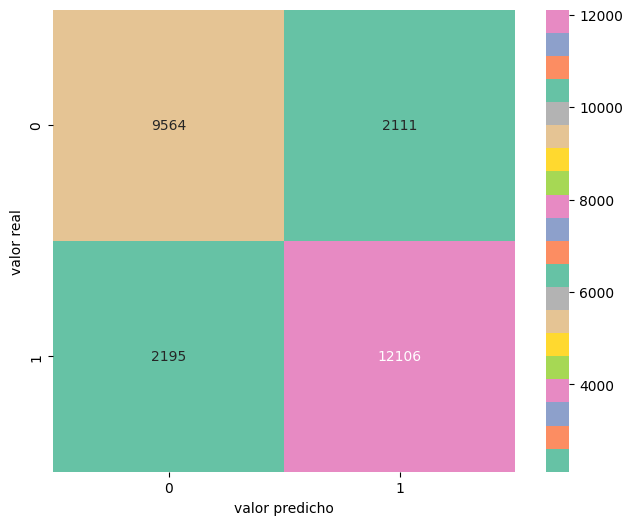

In [8]:
mat_lr_esta = confusion_matrix(y_test1, y_pred_test_esta)

plt.figure(figsize = (8, 6))
sns.heatmap(mat_lr_esta, square=True, annot=True, fmt="d", cmap = qualitative_colors)

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.savefig("../graficas/04_metricas_confusion_est_cod_outliers.png")
plt.show()

In [9]:
# vamos a hacernos una función para sacar las métricas igual que hicimos con al regresión lineal.


def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [10]:
results_logistic_esta = metricas(y_test1, y_pred_test_esta, y_train1, y_pred_train_esta, "Regresión logistica Esta")
results_logistic_esta

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.834232,0.851516,0.846514,0.849008,0.665261,test,Regresión logistica Esta
1,0.833933,0.848604,0.847304,0.847953,0.665018,train,Regresión logistica Esta


  Interpretamos los resultados de los test:

- En cuanto a la métrica kappa, vemos que nuestro resultado 0.66 es un valor bueno, pero que hay que mejorar el modelo para acercarnos lo máximo posible al 1.
- Como preferimos el Falso Negativo, nos fijamos primero en precision que nos indica un valor muy bueno 0.85, por lo que se equivocaría nuestro modelo 0.15 de las veces en lo que predice.
- Después nos fijamos en accuracy que nos da un resultado de 0.83 por lo que acierta un 83% de las veces.

In [11]:
df.to_pickle("../data/metricas_outliers_sin_tratar.pkl")